### Automatic Indexes: 
In this section, we hardcoded the indexes corresponding to the TMIN and TMAX columns. Use the header row to determine the indexes for these values, so your program can work for Sitka or Death Valley. Use the station name to automatically generate an appropriate title for your graph as well

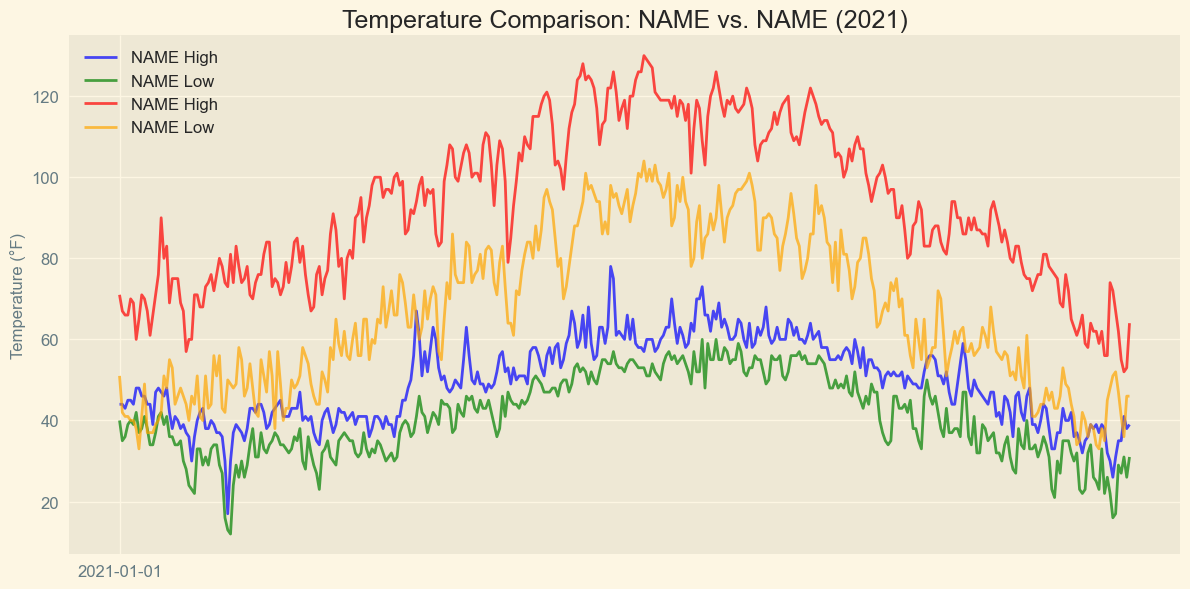

In [3]:
from pathlib import Path
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# File paths to the data files
sitka_file = Path('weather_data/sitka_weather_2021_full.csv')
death_valley_file = Path('weather_data/death_valley_2021_full.csv')

# Function to process the CSV files
def process_csv(file_path):
    with open(file_path) as file:
        reader = csv.reader(file)
        header_row = next(reader)
        
        # Find the indexes for TMIN and TMAX columns based on header row
        tmin_index = header_row.index('TMIN')
        tmax_index = header_row.index('TMAX')
        station_name = header_row[1]  # Get the station name from the header

        # Lists to store dates and temperature data
        dates, highs, lows = [], [], []

        for row in reader:
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            tmin = float(row[tmin_index]) if row[tmin_index] else None
            tmax = float(row[tmax_index]) if row[tmax_index] else None

            if tmin is not None and tmax is not None:
                dates.append(current_date)
                highs.append(tmax)
                lows.append(tmin)

        return station_name, dates, highs, lows

# Process data for Sitka
sitka_station, sitka_dates, sitka_highs, sitka_lows = process_csv(sitka_file)

# Process data for Death Valley
death_valley_station, death_valley_dates, death_valley_highs, death_valley_lows = process_csv(death_valley_file)

# Create a plot for temperature comparison
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the high and low temperatures for Sitka and Death Valley
ax.plot(sitka_dates, sitka_highs, c='blue', alpha=0.7, label=f'{sitka_station} High')
ax.plot(sitka_dates, sitka_lows, c='green', alpha=0.7, label=f'{sitka_station} Low')
ax.plot(death_valley_dates, death_valley_highs, c='red', alpha=0.7, label=f'{death_valley_station} High')
ax.plot(death_valley_dates, death_valley_lows, c='orange', alpha=0.7, label=f'{death_valley_station} Low')

# Set identical y-axis limits for both locations
ax.set_ylim(min(min(sitka_lows), min(death_valley_lows)) - 5, max(max(sitka_highs), max(death_valley_highs)) + 5)

# Format the plot
ax.set_title(f"Temperature Comparison: {sitka_station} vs. {death_valley_station} (2021)", fontsize=18)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Temperature (°F)", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

# Customize x-axis ticks to display every nth label (adjust n as needed)
n = 10
ax.set_xticks(ax.get_xticks()[::n])

# Add a legend
ax.legend(loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()  # Ensure that all elements fit within the figure area
plt.show()
